0


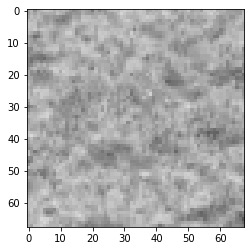

In [65]:
from os import listdir
import os.path as osp
import pandas as pd
import matplotlib.pyplot as plt
import pprint


path = '/home/workspace/data/.train/.task153/data/train'
path_test = 'home/workspace/data/.train/.task153/data/test'

# train.csv
# test.csv
label_dict = {}


with open(osp.join(path, "train.csv"), 'r') as l:
    l_pd = pd.read_csv(l)
    index =   12061
    image_name = l_pd['file_name'][index]
    label = l_pd['label'][index]
    img = plt.imread(osp.join(path,image_name))
    plt.imshow(img)
    print(label)



In [ ]:
"""for generating label"""
index = 4
a = l_pd['file_name'][index]
b= l_pd['title_name'][index]
c= l_pd['label'][index]
    

In [97]:
"""counting ok/ng per title"""

title_counter = {}
for title in (set((l_pd['title_name']))):

    to_list = list(l_pd['label'][l_pd['title_name'] == title])
    ok = to_list.count(0)
    ng = to_list.count(1)
    al = ok+ng
    title_counter[title] = (round(ng/al,2), al)

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(title_counter)

# 결함이 없는 타일은 없다.
# 타일별로 결함 비율이 다르다.
# 타일에 대한 이미지 수가 비슷하다.
# 많은 애는 30%까지

{   '1291m': (0.05, 632),
    '1613pm': (0.08, 720),
    '2183m': (0.1, 668),
    '2353m': (0.28, 943),
    '2898m': (0.05, 689),
    '2963m': (0.04, 608),
    '3163m': (0.02, 581),
    '3168m': (0.03, 631),
    '3292m': (0.13, 673),
    '3423m': (0.04, 635),
    '3593m': (0.26, 976),
    '8093m': (0.11, 734),
    '8159m': (0.01, 593),
    '8806m': (0.17, 769),
    '8925m': (0.13, 770),
    '9001': (0.02, 576),
    '9244m': (0.12, 663),
    '9413m': (0.19, 999),
    '9778m': (0.02, 572),
    '9907m': (0.01, 641)}


In [96]:
"""for counting ok/ng"""
label_list = list(l_pd['label'])
print(l_pd['label'])
print(label_list.count(0))
print(label_list.count(1))


0        0
1        0
2        0
3        0
4        0
        ..
14068    0
14069    0
14070    0
14071    1
14072    0
Name: label, Length: 14073, dtype: int64
12579
1494


In [88]:
"""training"""
#0) network
#1) augmentation: crop, randaug, mixup.. # 68*68
#2) sampler
#3) lr scheduler: cosine anealing, warmup
#4) batchnorm
#5) loss: ce
# 데이터에 맞는 처리

"""validation"""
# 5-fold cv
# ensemble

# 68*68
# normal: 12579 # 결함이 10%이다.
# defect: 1494 >> need augmentation and imbalanced ?
# title_name 20개 
print(1494/(12579+1494)) 

0.10616073331912172


In [ ]:
# 호성이형 블로그
# kaggle
# 호성이형 repo로 빠르게 >> single 모델 dashboard 올려보기

# 옵션 확인 >> ok
# f1 수정 >>> ok
# 데이터로더 수정 >> ok
# fold 받게 수정 >> ok 
# validate.py >> ok
# inference val 확인 >> inference에서 csv나오도록 수정 >>ok
#  prediction도 나오게, inference 시에 dataloader 수정 >>ok

# prediction 시 sigmoid해서 f1 최대로 만드는 threshold 찾기
# train에 patience 추가, 비교 ?
# randaug 추가 >> 
# imbalacned dataloader??
# lnd?


NameError: name 're' is not defined